In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Apurva HG\anaconda3\share\jupyter\lab\delhiaqi.csv") 
print(df.head())

                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19  


In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Apurva HG\anaconda3\share\jupyter\lab\delhiaqi.csv") 
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(df['date'].head())

0   2023-01-01 00:00:00
1   2023-01-01 01:00:00
2   2023-01-01 02:00:00
3   2023-01-01 03:00:00
4   2023-01-01 04:00:00
Name: date, dtype: datetime64[ns]


C:\Users\Apurva HG\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


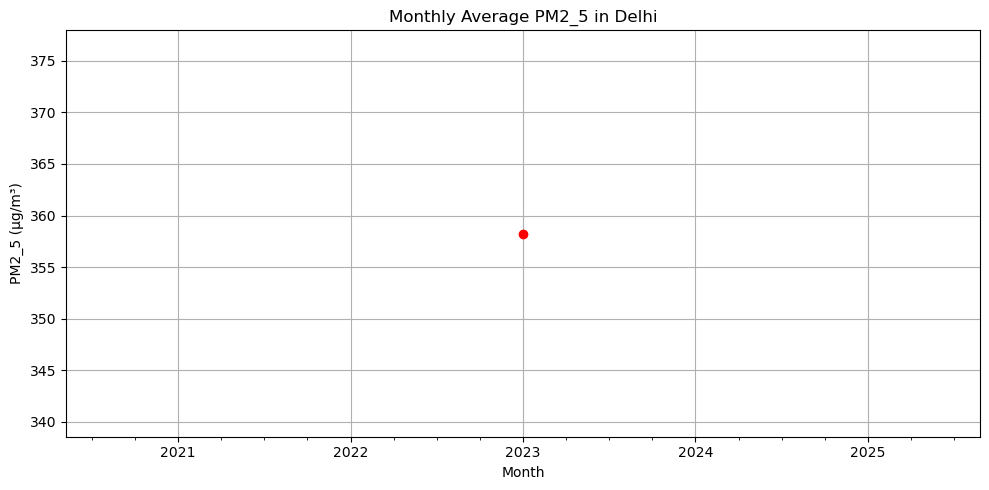

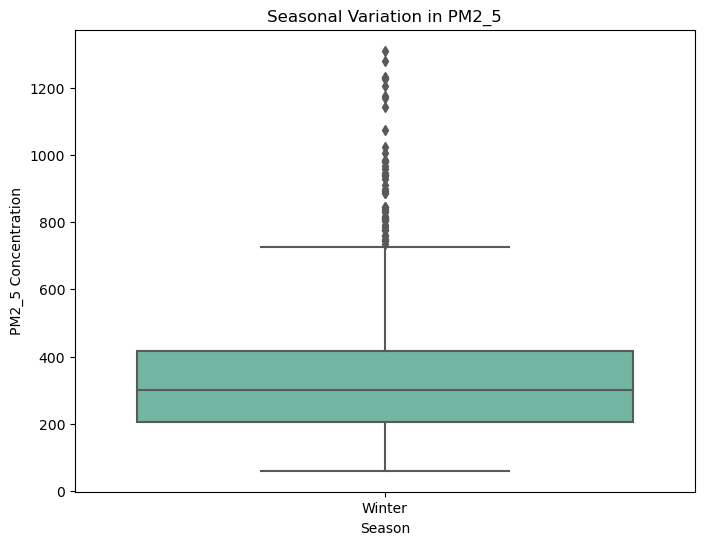


Summary Statistics:
             pm2_5         pm10         no2         so2            co  \
count   561.000000   561.000000  561.000000  561.000000    561.000000   
mean    358.256364   420.988414   75.292496   64.655936   3814.942210   
std     227.359117   271.287026   42.473791   61.073080   3227.744681   
min      60.100000    69.080000   13.370000    5.250000    654.220000   
25%     204.450000   240.900000   44.550000   28.130000   1708.980000   
50%     301.170000   340.900000   63.750000   47.210000   2590.180000   
75%     416.650000   482.570000   97.330000   77.250000   4432.680000   
max    1310.200000  1499.270000  263.210000  511.170000  16876.220000   

               o3  
count  561.000000  
mean    30.141943  
std     39.979405  
min      0.000000  
25%      0.070000  
50%     11.800000  
75%     47.210000  
max    164.510000  

Seasonal Averages:
             pm2_5        pm10        no2        so2          co
season                                                  

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\Apurva HG\anaconda3\share\jupyter\lab\delhiaqi.csv')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date', 'pm2_5'], inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.set_index('date', inplace=True)

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Autumn'

df['season'] = df.index.month.map(get_season)

monthly_pm2_5 = df['pm2_5'].resample('M').mean()

plt.figure(figsize=(10,5))
monthly_pm2_5.plot(marker='o', color='red')
plt.title("Monthly Average PM2_5 in Delhi")
plt.xlabel("Month")
plt.ylabel("PM2_5 (µg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='season', y='pm2_5', data=df, palette='Set2')
plt.title("Seasonal Variation in PM2_5")
plt.xlabel("Season")
plt.ylabel("PM2_5 Concentration")
plt.show()

print("\nSummary Statistics:")
print(df[['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3']].describe())

seasonal_avg = df.groupby('season')[['pm2_5', 'pm10', 'no2', 'so2', 'co']].mean()
print("\nSeasonal Averages:")
print(seasonal_avg)

In [8]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Apurva HG\anaconda3\share\jupyter\lab\delhiaqi.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date', 'pm2_5'], inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.set_index('date', inplace=True)

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df.index.month.map(get_season)

print(df['season'].value_counts())

season
Winter    561
Name: count, dtype: int64


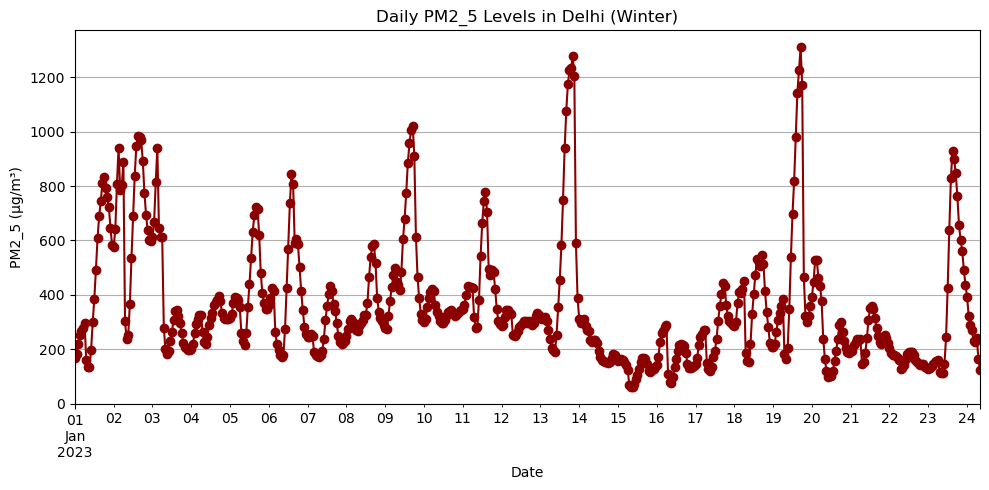

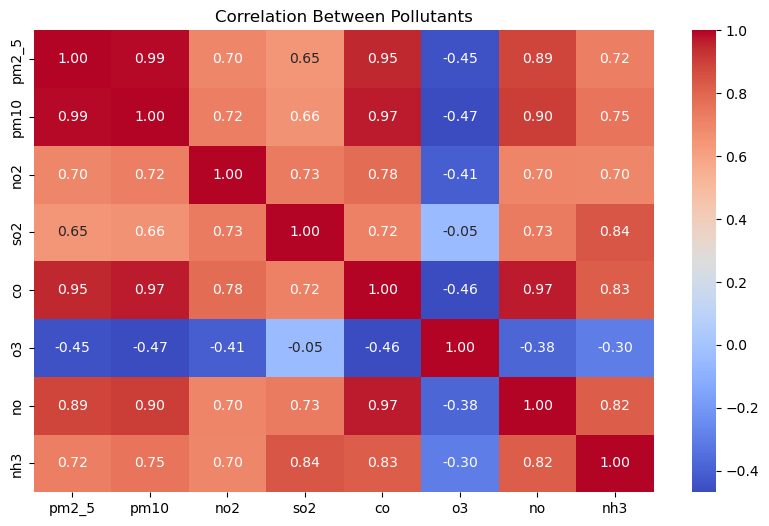

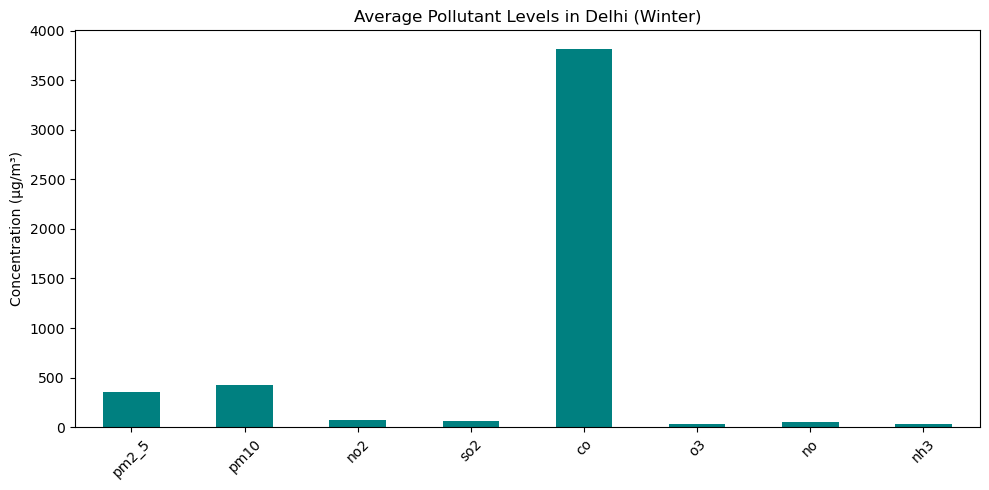

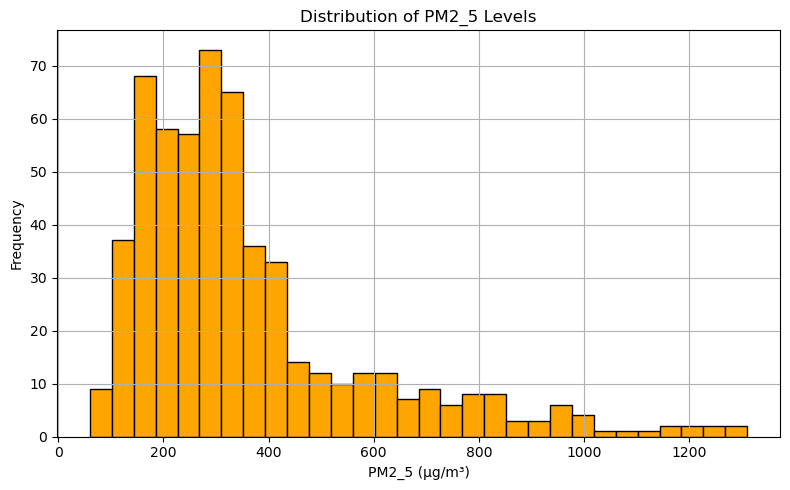

Top 10% PM2_5 Pollution Days:
                       pm2_5
date                        
2023-01-01 16:00:00   743.91
2023-01-01 17:00:00   811.40
2023-01-01 18:00:00   834.55
2023-01-01 19:00:00   791.61
2023-01-01 20:00:00   758.44
2023-01-01 21:00:00   722.30
2023-01-02 02:00:00   807.13
2023-01-02 03:00:00   940.49
2023-01-02 04:00:00   786.89
2023-01-02 05:00:00   802.84
2023-01-02 06:00:00   887.45
2023-01-02 13:00:00   838.72
2023-01-02 14:00:00   947.07
2023-01-02 15:00:00   984.28
2023-01-02 16:00:00   980.05
2023-01-02 17:00:00   967.81
2023-01-02 18:00:00   891.85
2023-01-02 19:00:00   775.74
2023-01-02 20:00:00   695.45
2023-01-03 02:00:00   813.70
2023-01-03 03:00:00   940.67
2023-01-05 15:00:00   692.16
2023-01-05 16:00:00   724.54
2023-01-05 17:00:00   717.30
2023-01-06 13:00:00   736.02
2023-01-06 14:00:00   844.98
2023-01-06 15:00:00   808.50
2023-01-09 13:00:00   775.94
2023-01-09 14:00:00   886.09
2023-01-09 15:00:00   957.55
2023-01-09 16:00:00  1004.77
2023-01-09 17

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Apurva HG\anaconda3\share\jupyter\lab\delhiaqi.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date', 'pm2_5'], inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.set_index('date', inplace=True)

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df.index.month.map(get_season)

plt.figure(figsize=(10,5))
df['pm2_5'].plot(color='darkred', marker='o')
plt.title("Daily PM2_5 Levels in Delhi (Winter)")
plt.xlabel("Date")
plt.ylabel("PM2_5 (µg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
corr = df[['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3','no','nh3']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Pollutants")
plt.show()

avg_pollutants = df[['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3','no','nh3']].mean()
plt.figure(figsize=(10,5))
avg_pollutants.plot(kind='bar', color='teal')
plt.title("Average Pollutant Levels in Delhi (Winter)")
plt.ylabel("Concentration (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
df['pm2_5'].hist(bins=30, color='orange', edgecolor='black')
plt.title("Distribution of PM2_5 Levels")
plt.xlabel("PM2_5 (µg/m³)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

peak_days = df[df['pm2_5'] > df['pm2_5'].quantile(0.90)]
print("Top 10% PM2_5 Pollution Days:")
print(peak_days[['pm2_5']])

print("\nSummary Statistics:")
print(df[['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'no','nh3']].describe())

seasonal_avg = df.groupby('season')[['pm2_5', 'pm10', 'no2', 'so2', 'co']].mean()
print("\nSeasonal Averages:")
print(seasonal_avg)

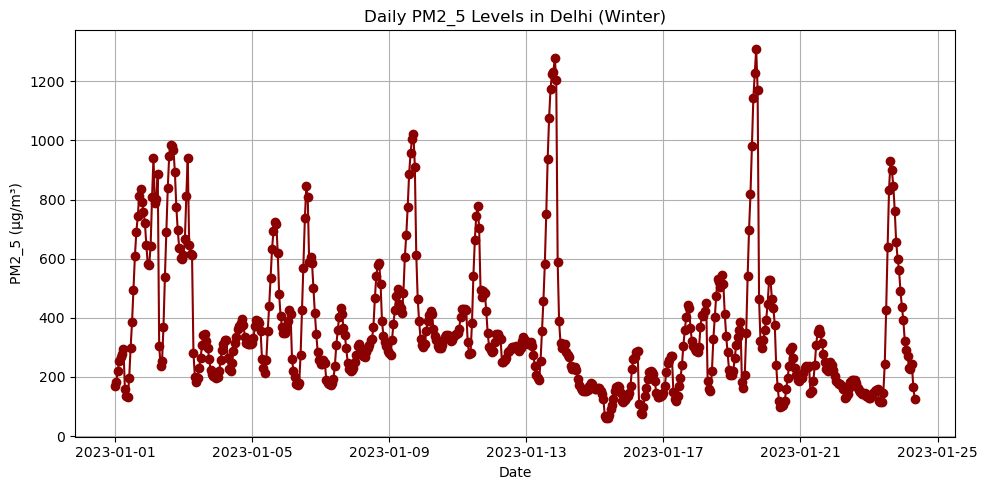

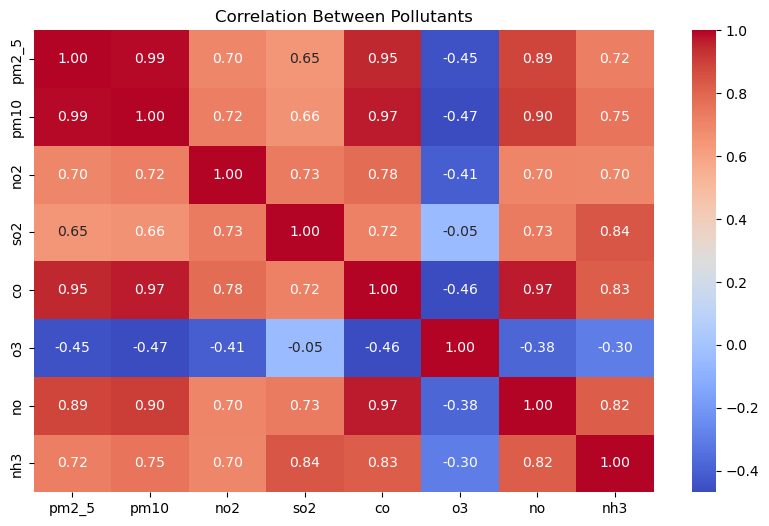

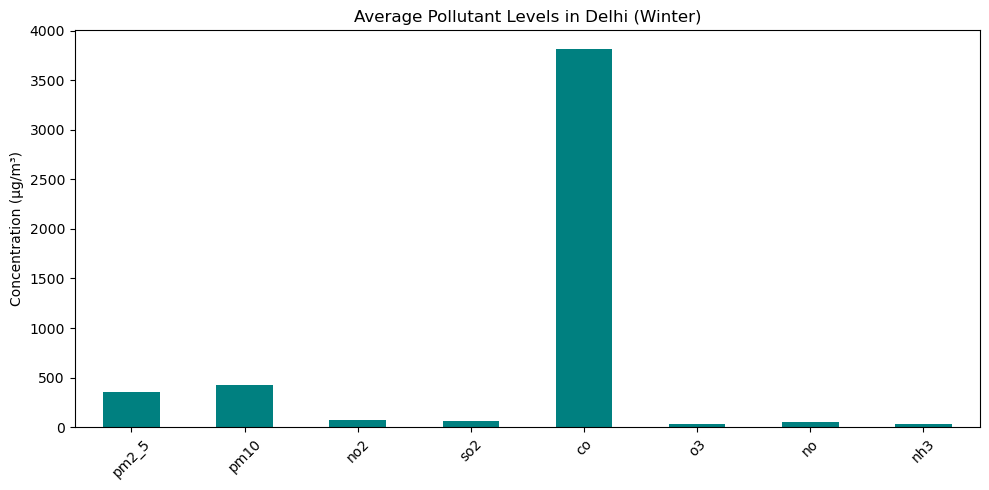

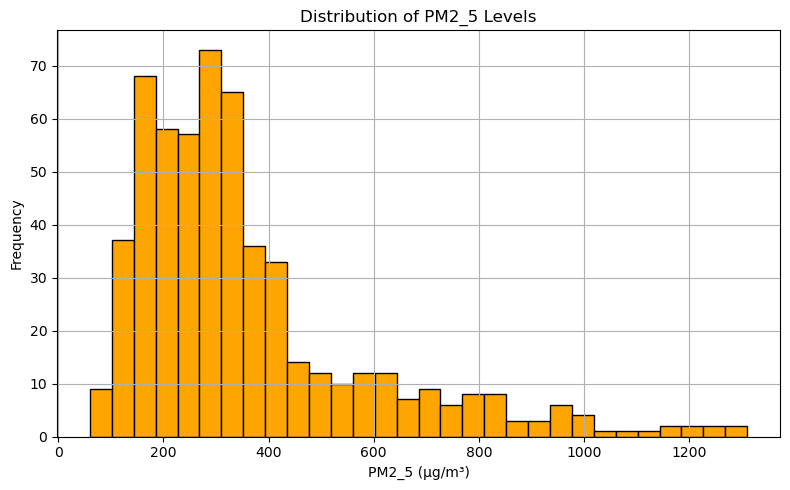

Top 10% PM2_5 Pollution Days:
                       pm2_5
date                        
2023-01-01 16:00:00   743.91
2023-01-01 17:00:00   811.40
2023-01-01 18:00:00   834.55
2023-01-01 19:00:00   791.61
2023-01-01 20:00:00   758.44
2023-01-01 21:00:00   722.30
2023-01-02 02:00:00   807.13
2023-01-02 03:00:00   940.49
2023-01-02 04:00:00   786.89
2023-01-02 05:00:00   802.84
2023-01-02 06:00:00   887.45
2023-01-02 13:00:00   838.72
2023-01-02 14:00:00   947.07
2023-01-02 15:00:00   984.28
2023-01-02 16:00:00   980.05
2023-01-02 17:00:00   967.81
2023-01-02 18:00:00   891.85
2023-01-02 19:00:00   775.74
2023-01-02 20:00:00   695.45
2023-01-03 02:00:00   813.70
2023-01-03 03:00:00   940.67
2023-01-05 15:00:00   692.16
2023-01-05 16:00:00   724.54
2023-01-05 17:00:00   717.30
2023-01-06 13:00:00   736.02
2023-01-06 14:00:00   844.98
2023-01-06 15:00:00   808.50
2023-01-09 13:00:00   775.94
2023-01-09 14:00:00   886.09
2023-01-09 15:00:00   957.55
2023-01-09 16:00:00  1004.77
2023-01-09 17

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path =(r"C:\Users\Apurva HG\anaconda3\share\jupyter\lab\delhiaqi.csv")
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date', 'pm2_5'])
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df.set_index('date', inplace=True)
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df['season'] = df.index.month.map(assign_season)
plt.figure(figsize=(10,5))
plt.plot(df.index, df['pm2_5'], color='darkred', marker='o')
plt.title("Daily PM2_5 Levels in Delhi (Winter)")
plt.xlabel("Date")
plt.ylabel("PM2_5 (µg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'no', 'nh3']
corr_matrix = df[pollutants].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Pollutants")
plt.show()
avg_levels = df[pollutants].mean()
plt.figure(figsize=(10,5))
avg_levels.plot(kind='bar', color='teal')
plt.title("Average Pollutant Levels in Delhi (Winter)")
plt.ylabel("Concentration (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,5))
df['pm2_5'].hist(bins=30, color='orange', edgecolor='black')
plt.title("Distribution of PM2_5 Levels")
plt.xlabel("PM2_5 (µg/m³)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
threshold = df['pm2_5'].quantile(0.90)
high_pollution_days = df[df['pm2_5'] > threshold]
print("Top 10% PM2_5 Pollution Days:")
print(high_pollution_days[['pm2_5']])
print("\nSummary Statistics:")
print(df[pollutants].describe())
seasonal_avg = df.groupby('season')[['pm2_5', 'pm10', 'no2', 'so2', 'co']].mean()
print("\nSeasonal Averages:")
print(seasonal_avg)